In [12]:
#Filter code from http://scipy-cookbook.readthedocs.io/items/FIRFilter.html

import numpy as np
from numpy import cos, sin, pi, absolute, arange
from scipy.signal import kaiserord, lfilter, firwin, freqz
from pylab import figure, clf, plot, xlabel, ylabel, xlim, ylim, title, grid, axes, show
import matplotlib.pyplot as plt
import allantools as al

data = np.fromfile('2017_6_20_17_7_40_adc1data.dat',dtype=np.int16,count = 10000000) #Read binary file into an array

range_sample_extent = 4096

if np.size(data)%range_sample_extent != 0:
        a = np.size(data) - np.size(data)%range_sample_extent
        data = data[:a]
print(np.size(data))

num_pulses = np.int(np.size(data))/(2*range_sample_extent)
print(num_pulses)

9998336
1220.5


In [20]:
offset = range_sample_extent*0
range_bin = 0 + offset

Zi = data[(2*range_bin)::(2*range_sample_extent)]
Zq = data[((2*range_bin)+1)::(2*range_sample_extent)]
   
Z = data[(2*range_bin)::(2*range_sample_extent)] + 1j * data[((2*range_bin)+1)::(2*range_sample_extent)]

print(Z)

[ -863.+1745.j -3162.+9107.j -2257.-7973.j ...,   180.-2545.j  5715. -347.j
 -3384.+1798.j]


<IPython.core.display.Javascript object>


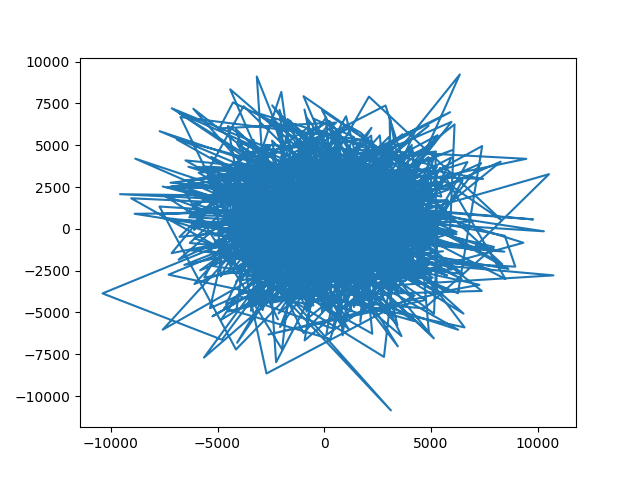

In [23]:
%matplotlib notebook 

n = np.arange(0,np.size(Zi))
plt.figure()

plt.plot(Zi,Zq)
plt.show()


In [18]:


sample_rate = 1000.0
nsamples = np.size(Z)
t = arange(nsamples) / sample_rate



<IPython.core.display.Javascript object>


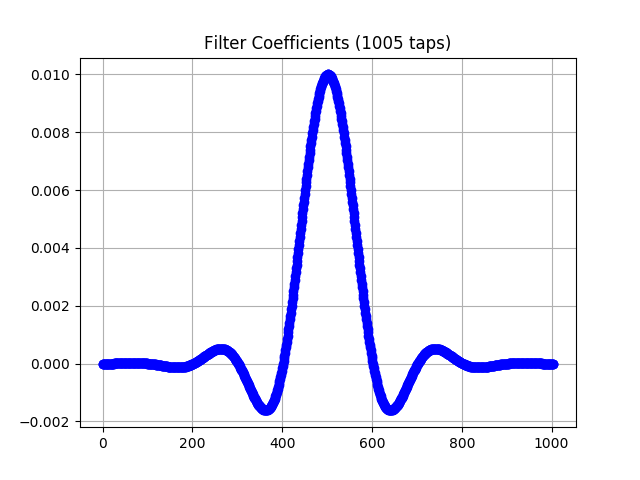

<IPython.core.display.Javascript object>


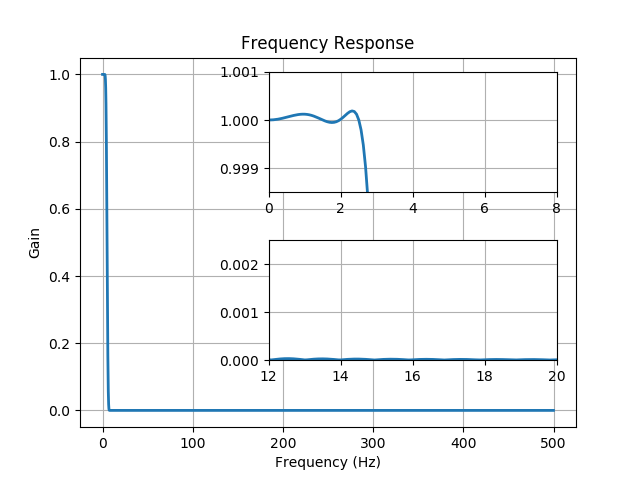

<IPython.core.display.Javascript object>


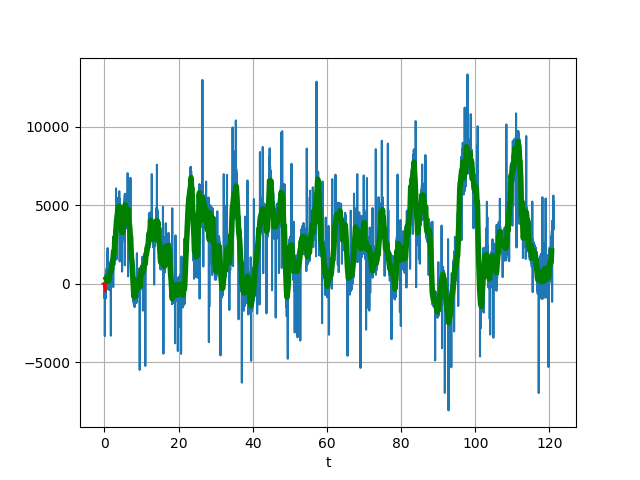

In [4]:
%matplotlib notebook 

#------------------------------------------------
# Create a FIR filter and apply it to x.
#------------------------------------------------

# The Nyquist rate of the signal.
nyq_rate = sample_rate / 2.0

# The desired width of the transition from pass to stop,
# relative to the Nyquist rate.  We'll design the filter
# with a 5 Hz transition width.
width = 5.0/nyq_rate

# The desired attenuation in the stop band, in dB.
ripple_db = 80.0

# Compute the order and Kaiser parameter for the FIR filter.
N, beta = kaiserord(ripple_db, width)

# The cutoff frequency of the filter.
cutoff_hz = 5.0

# Use firwin with a Kaiser window to create a lowpass FIR filter.
taps = firwin(N, cutoff_hz/nyq_rate, window=('kaiser', beta))

# Use lfilter to filter x with the FIR filter.
filtered_Zi = lfilter(taps, 1.0, Zi)
filtered_Zq = lfilter(taps, 1.0, Zq)
filtered_Z = lfilter(taps, 1.0, Z)
#------------------------------------------------
# Plot the FIR filter coefficients.
#------------------------------------------------

figure(1)
plot(taps, 'bo-', linewidth=2)
title('Filter Coefficients (%d taps)' % N)
grid(True)

#------------------------------------------------
# Plot the magnitude response of the filter.
#------------------------------------------------

figure(2)
clf()
w, h = freqz(taps, worN=8000)
plot((w/pi)*nyq_rate, absolute(h), linewidth=2)
xlabel('Frequency (Hz)')
ylabel('Gain')
title('Frequency Response')
ylim(-0.05, 1.05)
grid(True)

# Upper inset plot.
ax1 = axes([0.42, 0.6, .45, .25])
plot((w/pi)*nyq_rate, absolute(h), linewidth=2)
xlim(0,8.0)
ylim(0.9985, 1.001)
grid(True)

# Lower inset plot
ax2 = axes([0.42, 0.25, .45, .25])
plot((w/pi)*nyq_rate, absolute(h), linewidth=2)
xlim(12.0, 20.0)
ylim(0.0, 0.0025)
grid(True)

#------------------------------------------------
# Plot the original and filtered signals.
#------------------------------------------------

# The phase delay of the filtered signal.
delay = 0.5 * (N-1) / sample_rate

figure(3)
# Plot the original signal.
plot(t, Zi)
# Plot the filtered signal, shifted to compensate for the phase delay.
plot(t-delay, filtered_Zi, 'r-')
# Plot just the "good" part of the filtered signal.  The first N-1
# samples are "corrupted" by the initial conditions.
plot(t[N-1:]-delay, filtered_Zi[N-1:], 'g', linewidth=4)

xlabel('t')
grid(True)

show()

<IPython.core.display.Javascript object>


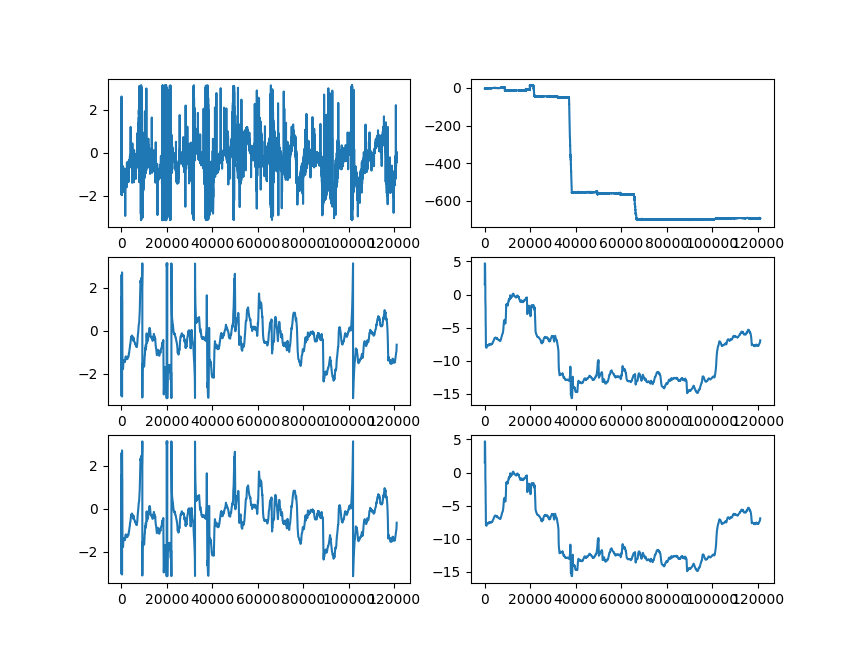

In [9]:
Z_post = filtered_Zi + 1j * filtered_Zq

phase = np.angle(Z_post)
unwr_phase = np.unwrap(phase,discont = np.pi/2)

phase_Z = np.angle(Z)
unwr_phase_Z = np.unwrap(phase_Z,discont = np.pi)


phase_Z_filt = np.angle(filtered_Z)
unwr_phase_Z_filt = np.unwrap(phase_Z_filt,discont = np.pi)

%matplotlib notebook 


plt.figure(4)

plt.subplot(321)
plt.plot(phase_Z)
plt.show()

plt.subplot(322)
plt.plot(unwr_phase_Z)
plt.show()

plt.subplot(323)
plt.plot(phase_Z_filt)
plt.show()

plt.subplot(324)
plt.plot(unwr_phase_Z_filt)
plt.show()

# Phase
plt.subplot(325)
plt.plot(phase)
plt.show()
# Unwraped Phase
plt.subplot(326)
plt.plot(unwr_phase)
plt.show()

